In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
def preprocessdata(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)

    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)

    return df

data = preprocessdata(data)


In [6]:
X = data[['Pclass', 'Age', 'Sex', 'Embarked_Q', 'Embarked_S']]
y = data['Survived']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [9]:
randomforest_model = RandomForestClassifier(random_state=42)


In [10]:
grid_search = GridSearchCV(estimator=randomforest_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [11]:
best_rf_model = grid_search.best_estimator_

In [12]:
predictions = best_rf_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 0.78


In [14]:
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [15]:
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       157
           1       0.80      0.64      0.71       111

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.78      0.78       268



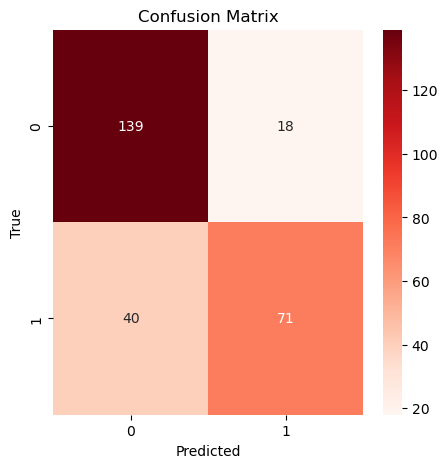

In [16]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
feature_importances = dict(zip(X.columns, best_rf_model.feature_importances_))
print("Feature Importances:")
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Pclass: 0.2079
Age: 0.2043
Sex: 0.5271
Embarked_Q: 0.0148
Embarked_S: 0.0461


In [19]:
randomforest_model.fit(X,y)

RandomForestClassifier(random_state=42)

In [23]:
def predict_survival(person_info):
    person_data = pd.DataFrame([person_info], columns=['Pclass', 'Age', 'Sex'])
    person_data['Sex'] = person_data['Sex'].map({'male': 0, 'female': 1})
    person_data['Embarked_Q'] = 0
    person_data['Embarked_S'] = 0

    survival_prediction = randomforest_model.predict(person_data)[0]
    return 'Survived' if survival_prediction == 1 else 'Not Survived'

In [26]:
person_info = {
    'Pclass': 3,
    'Age': 10,
    'Sex': 'male'
}

In [27]:
result = predict_survival(person_info)
print("Prediction:", result)

Prediction: Not Survived
